In [16]:
from sklearn.datasets import make_blobs

# Generate 2D data points
X, y = make_blobs(n_samples=100, centers=3, n_features=2,
                 cluster_std=0.2,  random_state=0)

print(X)
print(y)

[[ 2.17058568  0.85600391]
 [ 0.79717677  4.38116783]
 [ 2.24471791  0.86666164]
 [ 0.65349051  4.26123927]
 [ 0.76655949  4.01978374]
 [ 0.90668765  4.33505712]
 [-1.75639774  2.83031825]
 [-1.33701985  2.93539251]
 [ 2.18972647  0.97915603]
 [ 0.84940566  4.23123909]
 [ 1.12208819  4.32958391]
 [ 1.22232821  4.5442633 ]
 [ 2.14840001  0.59041492]
 [ 1.28282592  4.59765908]
 [-1.67585498  2.75259455]
 [ 2.42877931  1.07887259]
 [-1.54659452  2.7851866 ]
 [ 0.81364082  3.95853081]
 [-1.54055233  3.26055081]
 [-1.74778068  2.92831528]
 [-1.65562769  2.47320163]
 [-1.53476058  2.68426356]
 [-1.39887771  2.59449105]
 [ 0.79871293  3.90762803]
 [ 1.841117    1.10855401]
 [ 2.08064994  0.97806153]
 [ 1.90128431  1.0055135 ]
 [ 1.82223755  1.07782896]
 [-1.60074038  2.87000643]
 [-1.3725459   3.08258309]
 [ 1.00507879  4.59464203]
 [ 2.35291796  1.2768415 ]
 [ 1.97254373  0.7481727 ]
 [ 1.27508589  4.26275567]
 [-1.61801051  2.92137809]
 [-1.05027506  3.10677816]
 [ 0.95562631  4.38590703]
 

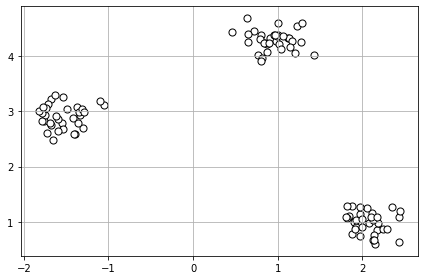

In [17]:
# Plot data points
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)   # s: size of marker
plt.grid()
plt.tight_layout()
plt.show()

For information on the KMeans algorithm, see the scikit-learn documentation at

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [18]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
model.fit(X)

KMeans(init='random', n_clusters=3, random_state=0)

In [19]:
# get the mean of each cluster
print(model.cluster_centers_)

[[ 2.0720792   0.98848385]
 [-1.538563    2.91165191]
 [ 0.95164831  4.28882085]]


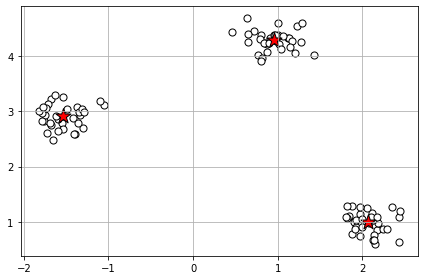

In [20]:
plt.scatter(X[:, 0], X[:, 1], c='white', marker='o', edgecolor='black', s=50)   # s: size of marker
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', marker='*', edgecolor='black', s=250)
plt.grid()
plt.tight_layout()
plt.show()

In [25]:
print(model.labels_)
print(y)

[0 2 0 2 2 2 1 1 0 2 2 2 0 2 1 0 1 2 1 1 1 1 1 2 0 0 0 0 1 1 2 0 0 2 1 1 2
 0 0 1 1 0 0 2 2 2 0 0 1 1 1 0 2 0 1 1 0 0 2 0 0 1 1 1 1 0 2 1 0 2 1 2 2 0
 0 2 2 2 1 0 2 2 0 2 0 2 2 2 0 2 0 0 1 1 1 1 2 2 1 1]
[1 0 1 0 0 0 2 2 1 0 0 0 1 0 2 1 2 0 2 2 2 2 2 0 1 1 1 1 2 2 0 1 1 0 2 2 0
 1 1 2 2 1 1 0 0 0 1 1 2 2 2 1 0 1 2 2 1 1 0 1 1 2 2 2 2 1 0 2 1 0 2 0 0 1
 1 0 0 0 2 1 0 0 1 0 1 0 0 0 1 0 1 1 2 2 2 2 0 0 2 2]


In [23]:
from sklearn.metrics import silhouette_score

# A silhouette score ranges from -1 to 1, with -1 being the worst score possible and 1 being the best score.
# it is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
# it is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample.
# metric: The metric to use when calculating distance between instances in a feature array.

# silhouette_score(X, model.labels_)
silhouette_score(X, model.labels_, metric='euclidean')

0.8816040239688525

In [26]:
from sklearn.metrics import  accuracy_score

y_changed = y.copy()
y_changed[y_changed == 0] = 2
y_changed[y_changed == 1] = 0
y_changed[y_changed == 2] = 1
accuracy_score(y_changed, model.labels_)

0.66

In [32]:
model.predict([[1.54659452, -2.7851866]])

array([0])